In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/train_data_for_all_1s.csv')

In [3]:
cols_to_drop = ['id', 'ni.age', 'len.at.res', 'premium']
data_new = data.drop(cols_to_drop, axis=1)

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop('cancel', axis=1).values
y = data['cancel'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_ytrain_pred = rf_model.predict_proba(X_train)
print("RF Train roc-auc:{}".format(roc_auc_score(y_train, rf_ytrain_pred[:,1])))

rf_y_test_pred = rf_model.predict_proba(X_test)
print("RF Test roc-acc:{}".format(roc_auc_score(y_test, rf_y_test_pred[:,1])))

#---------------------------------------------------------------------------------- 

# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

lg_ytrain_pred = lg_model.predict_proba(X_train)
print("LG Train roc-auc:{}".format(roc_auc_score(y_train, lg_ytrain_pred[:,1])))

lg_y_test_pred = lg_model.predict_proba(X_test)
print("LG Test roc-auc:{}".format(roc_auc_score(y_test, lg_y_test_pred[:,1])))



KeyboardInterrupt: 

In [ ]:
pred = []

for model in [rf_model, lg_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))

final_pred = pd.concat(pred, axis=1).mean(axis=1)
print("Ensemble test roc-auc:{}".format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc:0.7330955213318326


In [ ]:
# Calculate the roc-curve

False_pos_rate, True_pos_rate, threshold = roc_curve(y_test, final_pred)

threshold

array([1.9082357 , 0.9082357 , 0.87578563, ..., 0.02721729, 0.02660091,
       0.02002058])

In [ ]:
from sklearn.metrics import accuracy_score

acc = []

for thres in threshold:
    y_pred = np.where(final_pred>thres,1,0)

    #what ever prediction i am getting and if it is greater than threshold i'll be converting as 1 or i'll keep it as 0.




    acc.append(accuracy_score(y_test,y_pred,normalize=True))

    #Then i'll be computing my accuracy score with my y_test and then
    #append the accuracy inside acc list.



acc = pd.concat([pd.Series(threshold), pd.Series(acc)], axis=1)
acc.columns = ['threshold','accuracy']
acc.sort_values(by="accuracy", ascending=False, inplace = True)
acc.head()

,threshold,accuracy
24203,0.436714,0.727370
24204,0.436709,0.727365
24202,0.436717,0.727365
24192,0.436799,0.727360
24212,0.436660,0.727360


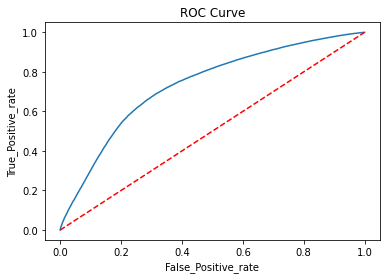

In [ ]:
import matplotlib.pyplot as plt
def plot_roc_curve(False_pos_rate,True_pos_rate):
     plt.plot(False_pos_rate, True_pos_rate, label="ROC")
     plt.plot([0,1],[0,1],color="Red",linestyle="--")
     plt.xlabel("False_Positive_rate")
     plt.ylabel("True_Positive_rate")
     plt.title("ROC Curve")
     plt.legend
     plt.show()

plot_roc_curve(False_pos_rate,True_pos_rate)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report

clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

THRESHOLD = 0.43
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), roc_auc_score(y_test, preds)], index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.629677
recall,0.783623
precision,0.428315
roc_auc_score,0.674693


In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.60      0.70    142754
           1       0.44      0.76      0.56     59267

    accuracy                           0.65    202021
   macro avg       0.65      0.68      0.63    202021
weighted avg       0.74      0.65      0.66    202021



In [ ]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[85300 57454]
 [14121 45146]]


Text(24.0, 0.5, 'Truth or Actual Value')

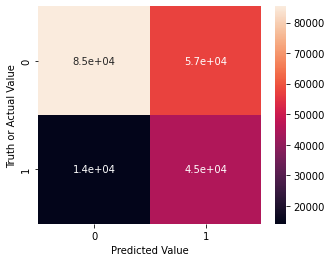

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

https://www.infinitycodex.in/how-to-find-optimal-threshold-value-and